# Live Graph Plot of COVID19 Daily Cases of Some States in India
## (Date vs Case Count)

In [33]:
# Importing necessary Libraries
import json
import urllib.request, urllib.parse, urllib.error
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta

# Checking for Certificate Error.
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Input the url from where we want to retrieve the live data
url = 'https://api.covid19india.org/raw_data16.json'

# Try to open the url or exit from the application.
try:
    uh = urllib.request.urlopen(url, context=ctx)
except:
    print("Wrong url.")
    quit()

# Reading the retrieved data
data = uh.read()
print('Retrieved', len(data), 'characters')

# Trying to load the data else quit.
try:
    js = json.loads(data)
except:
    js = None
    print('Corrupted')
    quit()

print('JSON Reading Done.')
print('Wait.......')

# Creating new dataframe to store the retrieved data
df = pd.DataFrame()
# Storing the data.
for i in js['raw_data']:
    if i['dateannounced'] == "":
        continue
    df = df.append(i, ignore_index=True)

# Saving all the data Locally for Later use.
df.to_csv('Saved_Live_Data.csv')
print('Data Saved.')

Retrieved 15403740 characters
JSON Reading Done.
Wait.......
Data Saved.


Data Cleaning Started......
Data Cleaning Done.
Now Plotting......


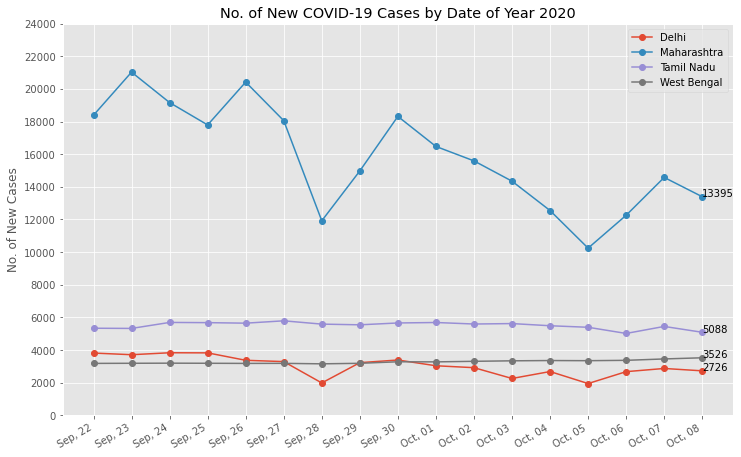

Plotted.
Finished.


<Figure size 432x288 with 0 Axes>

In [35]:
print('Data Cleaning Started......')

# reading the saved data and storing it to a variable.
mydf = pd.read_csv('Saved_Live_Data.csv')
# Cleaning the data to use.
newdf = mydf[mydf['currentstatus']=='Hospitalized'][['dateannounced', 'detectedstate', 'numcases']]

# Cleaning the data statewise.
workdf = newdf[newdf['detectedstate']=='Maharashtra']
workdf = workdf.append(newdf[newdf['detectedstate']=='Tamil Nadu'], ignore_index=True)
workdf = workdf.append(newdf[newdf['detectedstate']=='Delhi'], ignore_index=True)
workdf = workdf.append(newdf[newdf['detectedstate']=='West Bengal'], ignore_index=True)

# Formatting the date column
workdf['dateannounced'] = pd.to_datetime(workdf['dateannounced'], format='%d/%m/%Y')
# calculating total Cases.
plotdf = workdf.groupby(['dateannounced', 'detectedstate']).sum()

print('Data Cleaning Done.')
print('Now Plotting......')

# Saving Cleaned data.
plotdf.to_csv('Cleaned_Data.csv')
# Now Plotting:

# np.unique Returns the sorted unique elements in date column
x = np.unique(np.array([i[0] for i in plotdf.index]))

# For Delhi:
y_d = [plotdf.loc[i, 'Delhi'] for i in x]
# For Mahrastra:
y_m = [plotdf.loc[i, 'Maharashtra'] for i in x]
# For Tamil Nadu:
y_t = [plotdf.loc[i, 'Tamil Nadu'] for i in x]
# For West Bengal:
y_w = [plotdf.loc[i, 'West Bengal'] for i in x]

# Setting Figure Size & style.
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

# plotting each line.
plt.plot_date(x, y_d, label='Delhi', linestyle='-')
plt.plot_date(x, y_m, label='Maharashtra', linestyle='-')
plt.plot_date(x, y_t, label='Tamil Nadu', linestyle='-')
plt.plot_date(x, y_w, label='West Bengal', linestyle='-')


# Visual formatting
plt.xticks(x)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b, %d')
plt.gca().xaxis.set_major_formatter(date_format)

# For annotation.
ax = plt.gca()
def ano(i, j):
    ax.annotate(str(int(j[-1][0])), xy=(i[-1],j[-1]))
ano(x, y_d)
ano(x, y_m)
ano(x, y_t)
ano(x, y_w)
    
# Tiltle and ticks
plt.yticks(np.arange(0, 25000, 2000))
plt.ylabel('No. of New Cases')
plt.title('No. of New COVID-19 Cases by Date of Year 2020')

plt.legend()
plt.show()

plt.savefig("Saved_Graph.png")

print('Plotted.')
print('Finished.')